## Madrid Housing Price Analysis
This project seeks to build a model of housing prices in Madrid using the Madrid Housing Data set from Kaggle. This data has metrics such as the number of rooms, square feet, rents, property price, and so on for each cell group in the dataset.

1. Importation of Relevant Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Loading and reading in the dataset for analysis to begin
data = pd.read_csv('madrid_housing.csv')
data.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [5]:
#Let us first remove the `unnamed: 0` column and make `id` the index column
data.drop(columns=['Unnamed: 0'], inplace=True)
data.set_index('id', inplace=True)
data

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,
21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Ático en venta en Casco Histórico de Barajas,"Barajas, Madrid",78.0,NaN,2,2.0,NaN,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
4,Piso en venta en Urb. Campo de las Naciones - ...,"Barajas, Madrid",96.0,83.0,2,2.0,NaN,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,False,True,True,True
3,Piso en venta en Campo de las Naciones-Corralejos,"Barajas, Madrid",175.0,NaN,4,2.0,NaN,NaN,NaN,NaN,...,E,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN


* The dropped columns were dropped to make our dataset presentable. 
* Alternatively, we could have reshaped how that column was presented.

In [6]:
#How many rows and columns are present in this dataset
print('Rows and Columns: {}'.format(data.shape))

Rows and Columns: (21742, 56)


In [7]:
#Total Entries in this dataset
print('Total Entries: {}'.format(data.size))

Total Entries: 1217552


In [8]:
# Detailed information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21742 entries, 21742 to 1
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         21742 non-null  object 
 1   subtitle                      21742 non-null  object 
 2   sq_mt_built                   21616 non-null  float64
 3   sq_mt_useful                  8228 non-null   float64
 4   n_rooms                       21742 non-null  int64  
 5   n_bathrooms                   21726 non-null  float64
 6   n_floors                      1437 non-null   float64
 7   sq_mt_allotment               1432 non-null   float64
 8   latitude                      0 non-null      float64
 9   longitude                     0 non-null      float64
 10  raw_address                   16277 non-null  object 
 11  is_exact_address_hidden       21742 non-null  bool   
 12  street_name                   15837 non-null  object 
 13  s

* Observations points out that, 55 attributes or features came with this dataset.
* It can also be seen that some or almost all of a column has null counts -  this meant, the data isnt uniform.
* Datasets which aint uniform may give bias results and therefore they ought to be treated.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sq_mt_built,21616.0,146.920892,134.181865,13.0,70.0,100.0,162.0,999.0
sq_mt_useful,8228.0,103.458192,88.259192,1.0,59.0,79.0,113.0,998.0
n_rooms,21742.0,3.005749,1.510497,0.0,2.0,3.0,4.0,24.0
n_bathrooms,21726.0,2.091687,1.406992,1.0,1.0,2.0,2.0,16.0
n_floors,1437.0,3.128740,0.907713,1.0,2.0,3.0,4.0,7.0
sq_mt_allotment,1432.0,241.692737,247.484853,1.0,2.0,232.0,354.0,997.0
latitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
portal,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
door,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* a descriptive statistics of the numerical values present in the dataset

In [10]:
# Verifying if there are duplicates among our dataset
print('Duplicated Counts: {}'.format(data.duplicated().sum()))

Duplicated Counts: 179


In [11]:
# Verifying if there are null counts in our dataset
data.isna().sum().sort_values()

title                               0
has_parking                         0
energy_certificate                  0
is_buy_price_known                  0
buy_price_by_area                   0
buy_price                           0
is_rent_price_known                 0
rent_price                          0
operation                           0
neighborhood_id                     0
is_exact_address_hidden             0
is_renewal_needed                   0
n_rooms                             0
subtitle                            0
n_bathrooms                        16
sq_mt_built                       126
house_type_id                     391
is_new_development                992
is_floor_under                   1170
has_lift                         2386
floor                            2607
is_exterior                      3043
raw_address                      5465
street_name                      5905
has_central_heating              8134
has_individual_heating           8134
has_fitted_w

* The output above showcased the ordered null counts values in our dataset. With '0' being none of the entries are empty and '21742' being all the entries cells are null.

In [12]:
# viewing all columns
data.columns

Index(['title', 'subtitle', 'sq_mt_built', 'sq_mt_useful', 'n_rooms',
       'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude', 'longitude',
       'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is_orien

* The column function was called to remove unnecessary attributes from our analysis

In [13]:
#removing attributes that wouldnt be neededfor our modeling
data.drop(columns=['title', 'subtitle', 'sq_mt_useful','n_floors', 
       'sq_mt_allotment', 'latitude', 'longitude',
       'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east'], inplace=True)

In [14]:
#calling the data
data

,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,is_new_development,is_furnished
id,,,,,,,
21742,64.0,2,1.0,471,85000,False,NaN
21741,70.0,3,1.0,666,129900,False,NaN
21740,94.0,2,2.0,722,144247,False,NaN
21739,64.0,2,1.0,583,109900,False,NaN
21738,108.0,2,2.0,1094,260000,False,NaN
...,...,...,...,...,...,...,...
5,78.0,2,2.0,1323,350000,False,NaN
4,96.0,2,2.0,1496,425000,False,NaN
3,175.0,4,2.0,2081,680000,False,NaN


In [15]:
data.rename(columns= {'sq_mt_built':'sq_metres', 'n_rooms':'rooms', 'n_bathrooms':'bathrooms', 'rent_price':'rents', 'is_new_development':'newly_developed', 'is_furnished':'furnished'}, inplace=True)

* The labels which came with the dataset were transformed and renamed well.

In [16]:
data

,sq_metres,rooms,bathrooms,rents,buy_price,newly_developed,furnished
id,,,,,,,
21742,64.0,2,1.0,471,85000,False,NaN
21741,70.0,3,1.0,666,129900,False,NaN
21740,94.0,2,2.0,722,144247,False,NaN
21739,64.0,2,1.0,583,109900,False,NaN
21738,108.0,2,2.0,1094,260000,False,NaN
...,...,...,...,...,...,...,...
5,78.0,2,2.0,1323,350000,False,NaN
4,96.0,2,2.0,1496,425000,False,NaN
3,175.0,4,2.0,2081,680000,False,NaN


In [17]:
data.isna().sum()

sq_metres            126
rooms                  0
bathrooms             16
rents                  0
buy_price              0
newly_developed      992
furnished          21742
dtype: int64

In [18]:
#dropping the furnished column because all of its entries are null or 'NaN'
data.drop(columns=['furnished'], inplace=True)

In [19]:
data.head()

,sq_metres,rooms,bathrooms,rents,buy_price,newly_developed
id,,,,,,
21742,64.0,2,1.0,471,85000,False
21741,70.0,3,1.0,666,129900,False
21740,94.0,2,2.0,722,144247,False
21739,64.0,2,1.0,583,109900,False
21738,108.0,2,2.0,1094,260000,False


In [20]:
data = data.dropna(axis=0)

* dropping the null counts by their rows.

In [21]:
data.isna().sum()

sq_metres          0
rooms              0
bathrooms          0
rents              0
buy_price          0
newly_developed    0
dtype: int64

In [22]:
data.shape

(20613, 6)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20613 entries, 21742 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sq_metres        20613 non-null  float64
 1   rooms            20613 non-null  int64  
 2   bathrooms        20613 non-null  float64
 3   rents            20613 non-null  int64  
 4   buy_price        20613 non-null  int64  
 5   newly_developed  20613 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='newly_developed', ylabel='count'>

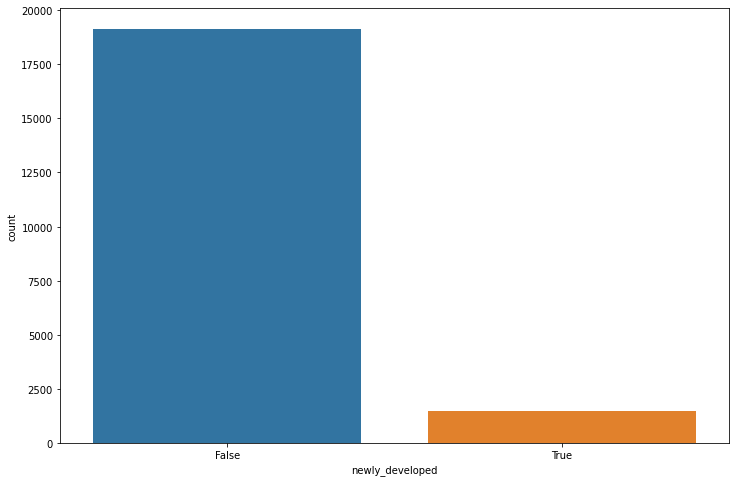

In [24]:
# The quantity of listings which are newly developed vs those which are olden.
plt.figure(figsize=(12,8))
sns.countplot(x='newly_developed', data=data)


* Most of the properties listed are not newly developed; they are fairly old listings

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

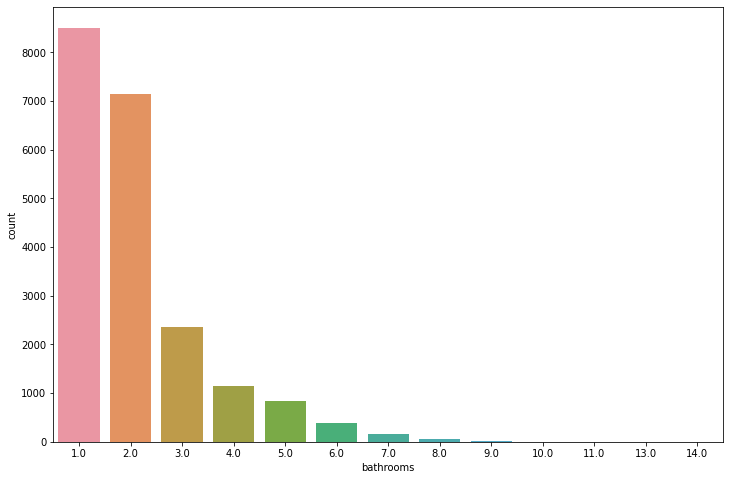

In [25]:
# Frequency of Bathrooms
plt.figure(figsize=(12,8))
sns.countplot(x='bathrooms', data=data)

* Most of the listings contains one or two bathrooms.

<AxesSubplot:xlabel='rooms', ylabel='count'>

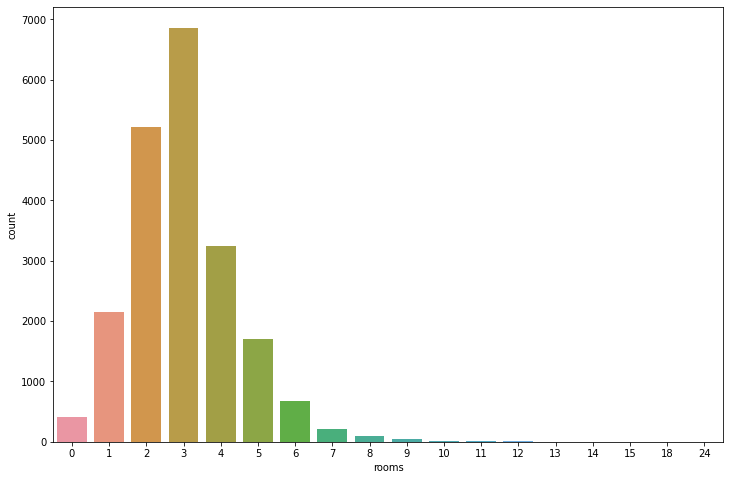

In [26]:
# Frequency of Rooms 
plt.figure(figsize=(12,8))
sns.countplot(x='rooms', data=data)

* Most of the listings per this dataset had 2 or 3 rooms.

In [27]:
#correlation of the variables present in this analysis
corr = data.corr()
corr

,sq_metres,rooms,bathrooms,rents,buy_price
sq_metres,1.000000,0.718880,0.853038,-0.232205,0.831201
rooms,0.718880,1.000000,0.713110,-0.124204,0.587744
bathrooms,0.853038,0.713110,1.000000,-0.154193,0.755793
rents,-0.232205,-0.124204,-0.154193,1.000000,-0.436686
buy_price,0.831201,0.587744,0.755793,-0.436686,1.000000


In [28]:
data.corr()['buy_price'].sort_values(ascending=False)

buy_price    1.000000
sq_metres    0.831201
bathrooms    0.755793
rooms        0.587744
rents       -0.436686
Name: buy_price, dtype: float64

<AxesSubplot:>

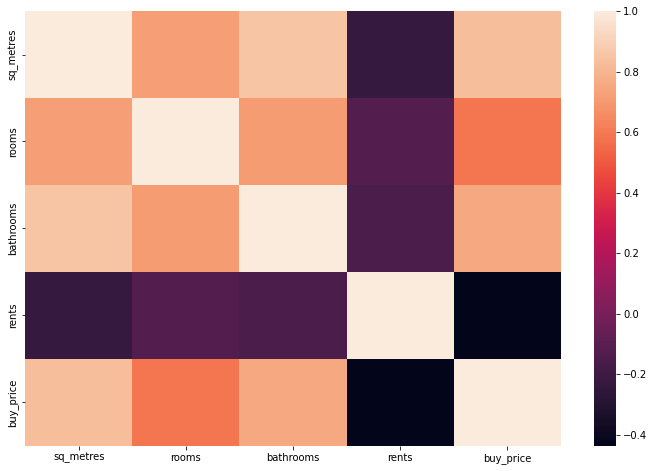

In [29]:
# Visualization of the correlations between the variables
plt.figure(figsize=(12,8))
sns.heatmap(corr)

* Strong correlation between 'buy_price' and 'square metres', as well as 'bathrooms'
* Very good correlation between 'buy_price' and 'rooms' whiles there was not relationship between 'buy_price' and 'rents'

c:\Users\Ofori Kingsley\AppData\Local\Programs\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='buy_price', ylabel='Density'>

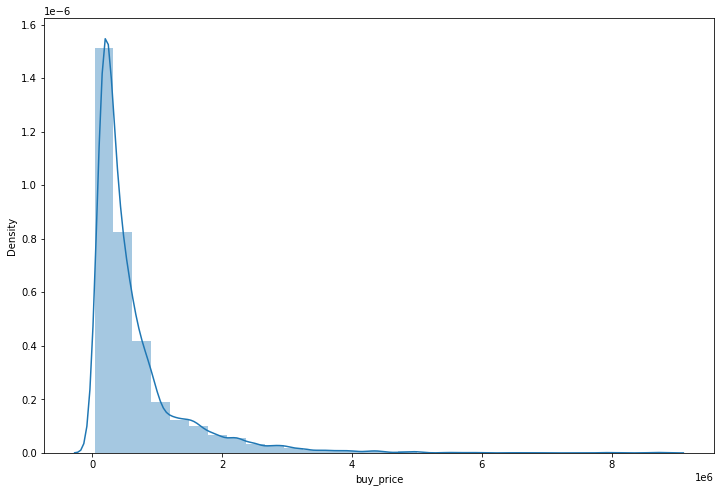

In [30]:
plt.figure(figsize=(12,8))
sns.distplot(data['buy_price'],bins=30)

c:\Users\Ofori Kingsley\AppData\Local\Programs\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sq_metres', ylabel='Density'>

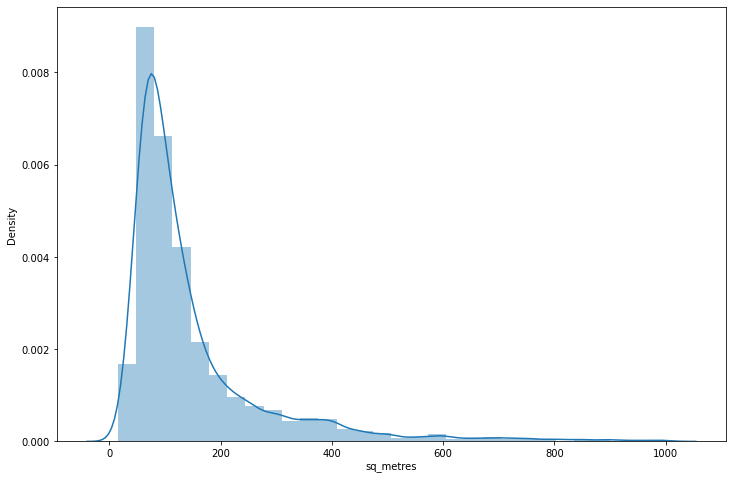

In [31]:
plt.figure(figsize=(12,8))
sns.distplot(data['sq_metres'],bins=30)

<AxesSubplot:xlabel='sq_metres', ylabel='buy_price'>

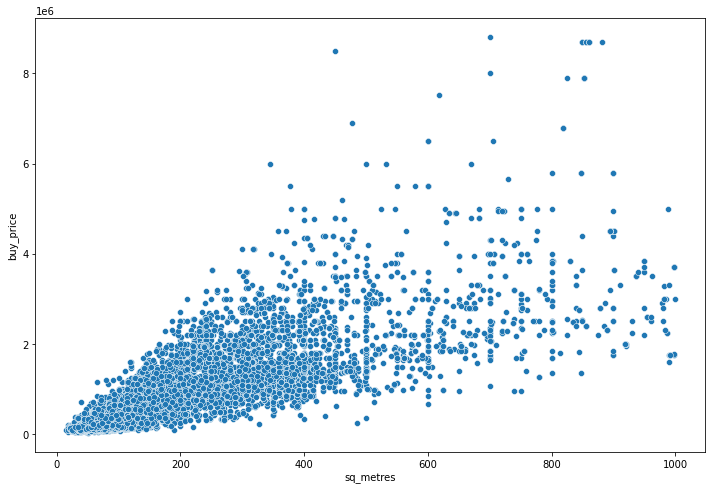

In [32]:
# VISUALIZATION SHOWING BUY PRICE AND SQUARE METRES
plt.figure(figsize=(12,8))
sns.scatterplot(x='sq_metres', y='buy_price', data=data)

<AxesSubplot:xlabel='rooms', ylabel='buy_price'>

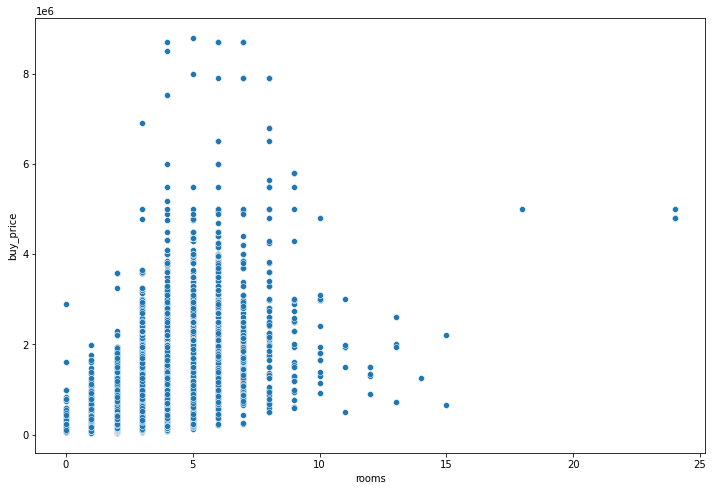

In [33]:
# Scatterplot showing ROOMS VRS BUY PRICE
plt.figure(figsize=(12,8))
sns.scatterplot(x='rooms', y='buy_price', data=data)

In [34]:
# Ranking the dataset by rooms to showcase the three outliers above.
data.sort_values('rooms', ascending=False).head(20)

,sq_metres,rooms,bathrooms,rents,buy_price,newly_developed
id,,,,,,
7518,682.0,24,4.0,-2443600,4800000,False
7169,750.0,24,4.0,-2937084,5000000,False
7452,682.0,24,4.0,-2443600,4800000,False
6484,750.0,18,7.0,-2937084,5000000,False
5282,390.0,15,7.0,2012,650000,False
6127,578.0,15,2.0,-51191,2200000,False
3285,207.0,14,4.0,1536,1250000,False
12347,513.0,13,13.0,2159,715000,False
3515,440.0,13,3.0,-128137,2600000,False


<AxesSubplot:xlabel='sq_metres'>

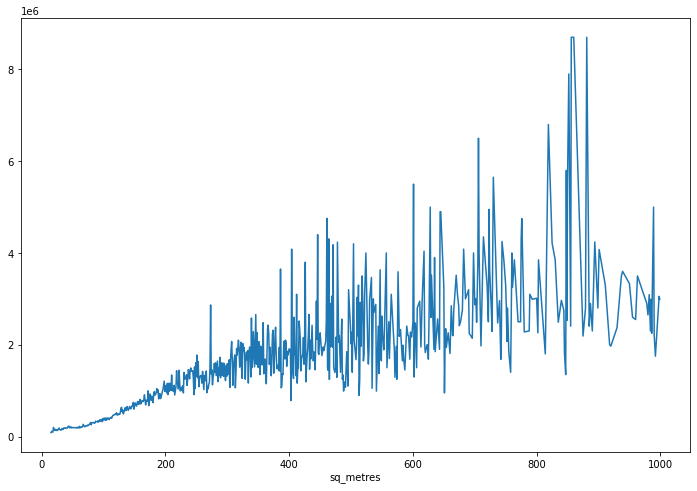

In [35]:
# Visualization of the trend between buy-prices and square metres
plt.figure(figsize=(12,8))
data.groupby('sq_metres').mean()['buy_price'].plot()

<AxesSubplot:xlabel='bathrooms', ylabel='buy_price'>

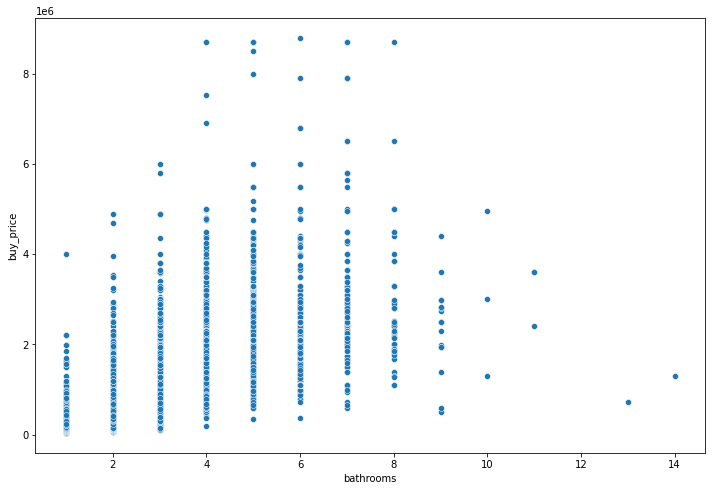

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='bathrooms', y='buy_price', data=data)

<AxesSubplot:xlabel='rents', ylabel='buy_price'>

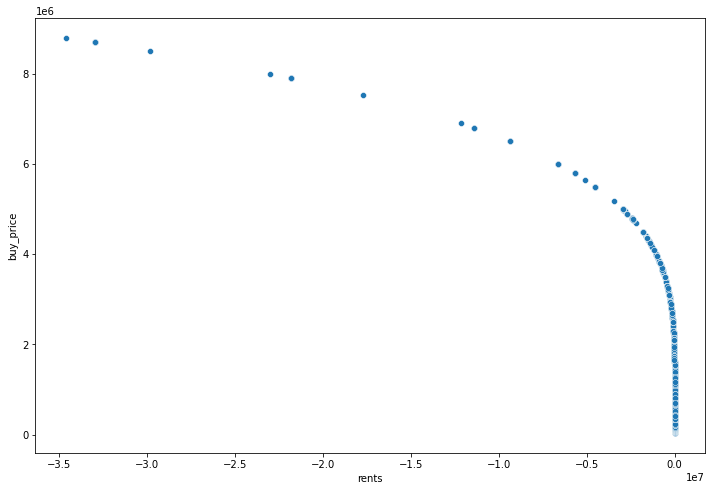

In [37]:
# Buy price versus Rents
plt.figure(figsize=(12,8))
sns.scatterplot(x='rents', y='buy_price', data=data)

2. Linear Regression

In [38]:
x = data.drop(columns=['buy_price'])
y = data['buy_price']

In [39]:
from sklearn.model_selection import train_test_split

In [64]:
x_train, x_test, y_train, y_test =train_test_split(x, y, random_state=5, test_size=0.1)

* Calling the 'train test split' module to split the variables into target variables and its features.

In [65]:
print(x.shape, x_test.shape, x_train.shape)

(20613, 5) (2062, 5) (18551, 5)


In [66]:
print(y.shape, y_test.shape, y_train.shape)

(20613,) (2062,) (18551,)


In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [68]:
model.fit(x_train, y_train)

LinearRegression()

In [69]:
model.intercept_

-58131.40523033892

In [70]:
model.coef_

array([ 3.39576647e+03, -2.56064990e+04,  1.28700003e+05, -2.45925441e-01,
       -2.40992153e+04])

In [71]:
predictions = model.predict(x_test)

In [72]:
predictions

array([205951.09935546, 292297.42431095, 468446.42754737, ...,
       912428.80975029, 548136.97041604, 876937.08860017])

In [73]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(y_test, predictions)

219176.99493543775

In [74]:
from sklearn.metrics import mean_squared_error


mean_squared_error(y_test, predictions)

144957342258.74692

In [75]:
np.sqrt(mean_squared_error(y_test, predictions))

380732.638814624

In [76]:
data['buy_price'].describe()

count    2.061300e+04
mean     6.445759e+05
std      7.448765e+05
min      3.600000e+04
25%      2.000000e+05
50%      3.782000e+05
75%      7.650000e+05
max      8.800000e+06
Name: buy_price, dtype: float64

In [53]:
6.445759e+05

644575.9

In [78]:
100*219176.99493543775/644575.9

34.00328726771164

In [79]:
from sklearn.metrics import explained_variance_score


explained_variance_score(y_test, predictions)

0.7188012663735766

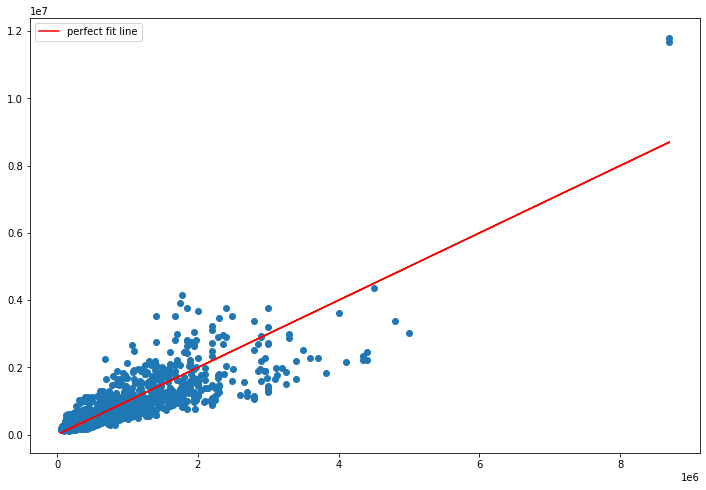

In [80]:
plt.figure(figsize=(12,8))

# Our predictions
plt.scatter(y_test, predictions);

# Perfect predictions
plt.plot(y_test, y_test, color='r', label='perfect fit line')
plt.legend();

In [81]:
score = model.score(x_test, y_test)
print('Test accuracy:',(score)*100)

Test accuracy: 71.86960984743604
